In [1]:
from bunkatech.semantics.bourdieu import Bourdieu
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)



In [3]:
model = Bourdieu()
model.fit(data = data, text_var = 'description', index_var = 'imdb')

In [4]:
terms = model.extract_terms(sample_size = 10000,
                    limit=10000,
                    ents=True,
                    ncs=True,
                    ngrams=(1, 2),
                    include_pos=["NOUN", "PROPN", "ADJ"],
                    include_types=["PERSON", "ORG"],
                    language="en")

df_bert = model.sbert_embedding(bert_model="distiluse-base-multilingual-cased-v1")

Extract Terms: 100%|████████████████████████| 9401/9401 [02:03<00:00, 76.12it/s]


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [19]:
# Les documents assoicent souvent ces concepts ensemble. Par exmple, pour les films ils sont souvent associés

Some required terms are not in the initial dataset. Embedding the new terms...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

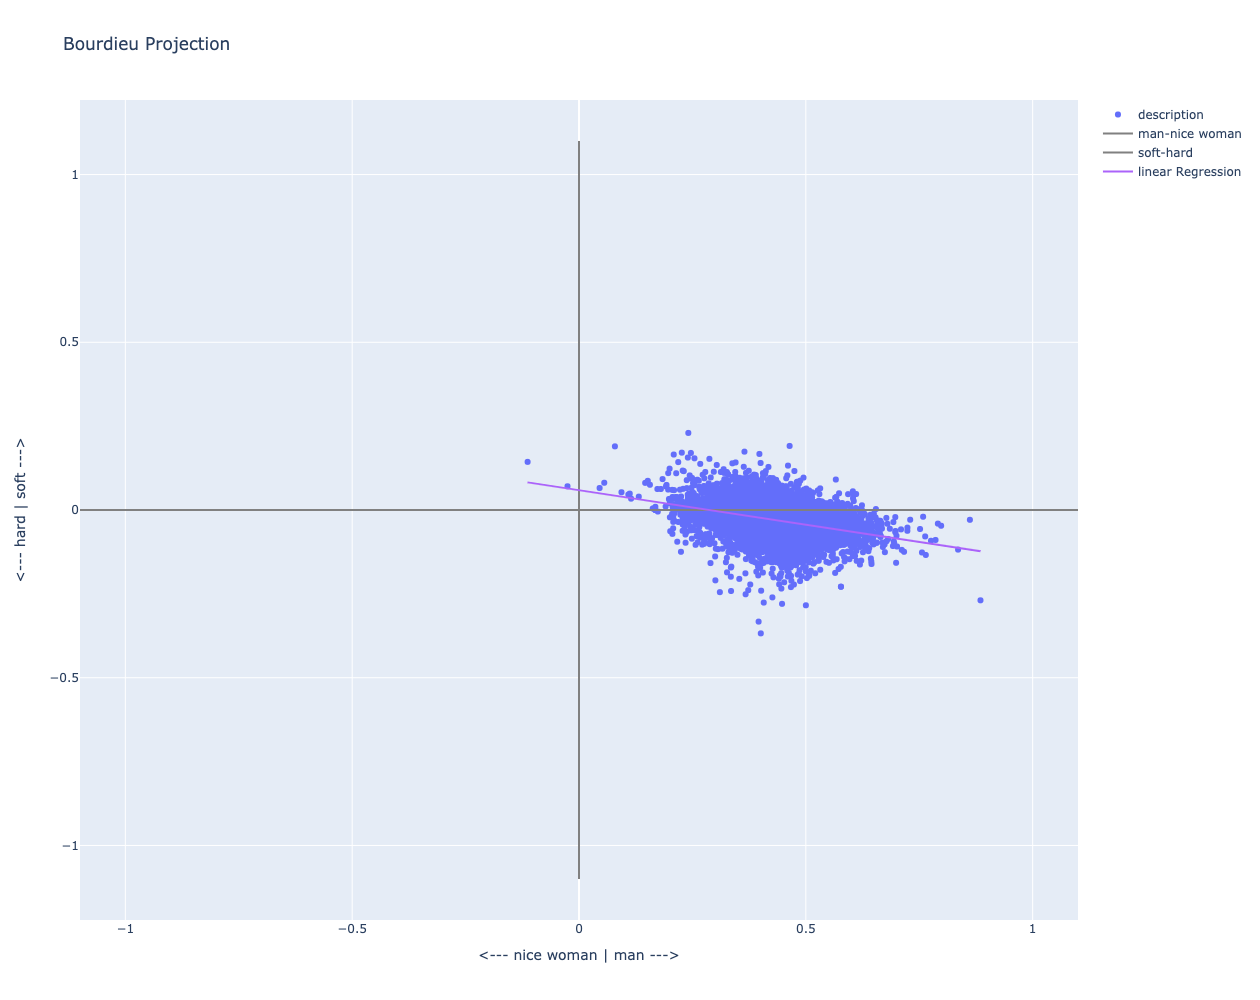

In [24]:
projection = ['man', 'nice woman'] 
projection_2 = ['soft', 'hard']
fig_document = model.bourdieu_projection_documents(projection = projection, 
                                                   projection_2 = projection_2,
                                                   width=1000,
                                                   height=1000,
                                                   regression = True,
                                                   projected_var = None)
fig_document.show()

In [8]:
fig_terms  = model.bourdieu_projection_terms(
                    projection = projection,
                    projection_2 = projection_2,
                    height = 1000,
                    width = 1000)

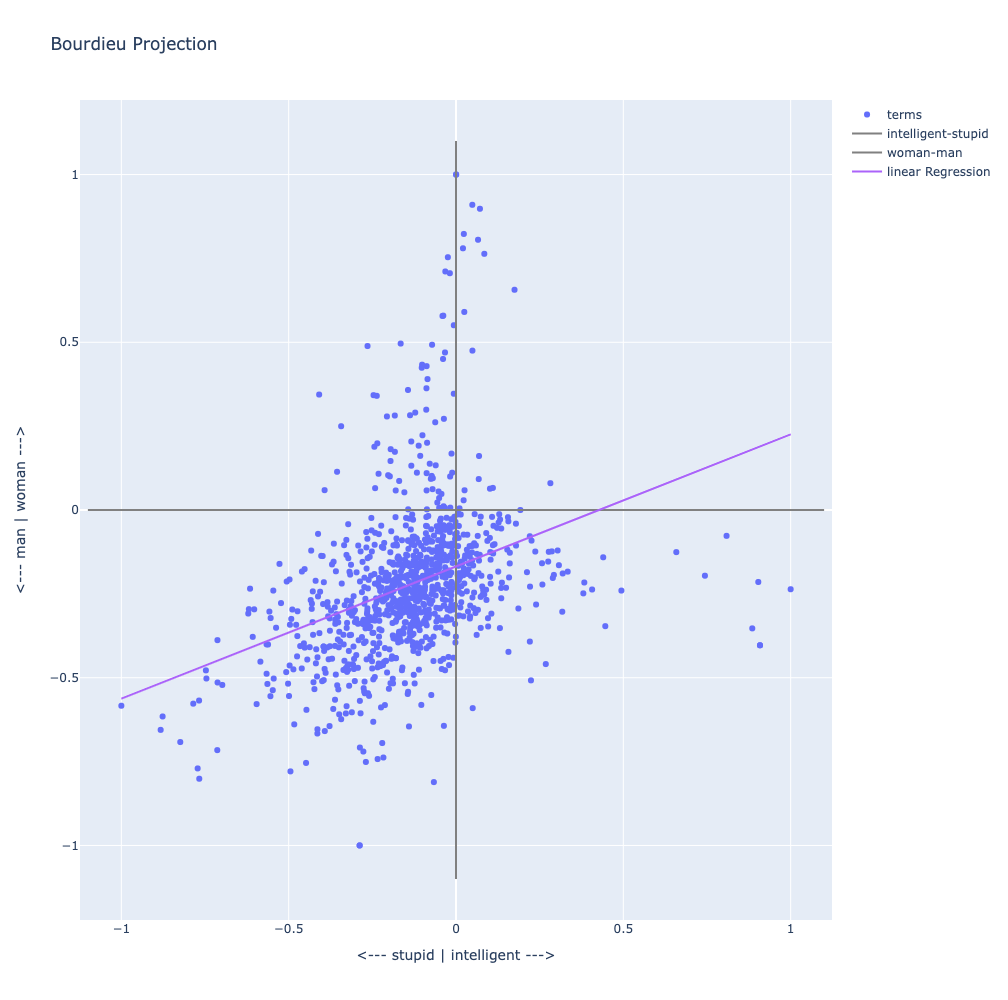

In [11]:
fig_terms.show()

In [64]:
data_hum = pd.read_csv('/Users/charlesdedampierre/Desktop/ENS Projects/humility/final_annotations/charles_jan_noemon_final_annotations.csv', sep = '\t')

len(set(data_hum['id']))

model_hum = Bourdieu()
model_hum.fit(data = data_hum, text_var = 'body', index_var = 'id')

terms = model_hum.extract_terms(sample_size = 10000,
                    limit=10000,
                    ents=True,
                    ncs=True,
                    ngrams=(1, 2),
                    include_pos=["NOUN", "PROPN", "ADJ"],
                    include_types=["PERSON", "ORG"],
                    language="en")

df_bert = model_hum.sbert_embedding(bert_model="distiluse-base-multilingual-cased-v1")

Extract Terms: 100%|██████████████████████████| 670/670 [00:16<00:00, 40.66it/s]


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [79]:
projection = ['intelligent', 'dumb'] 
projection_2 = ['confidence', 'doubt']

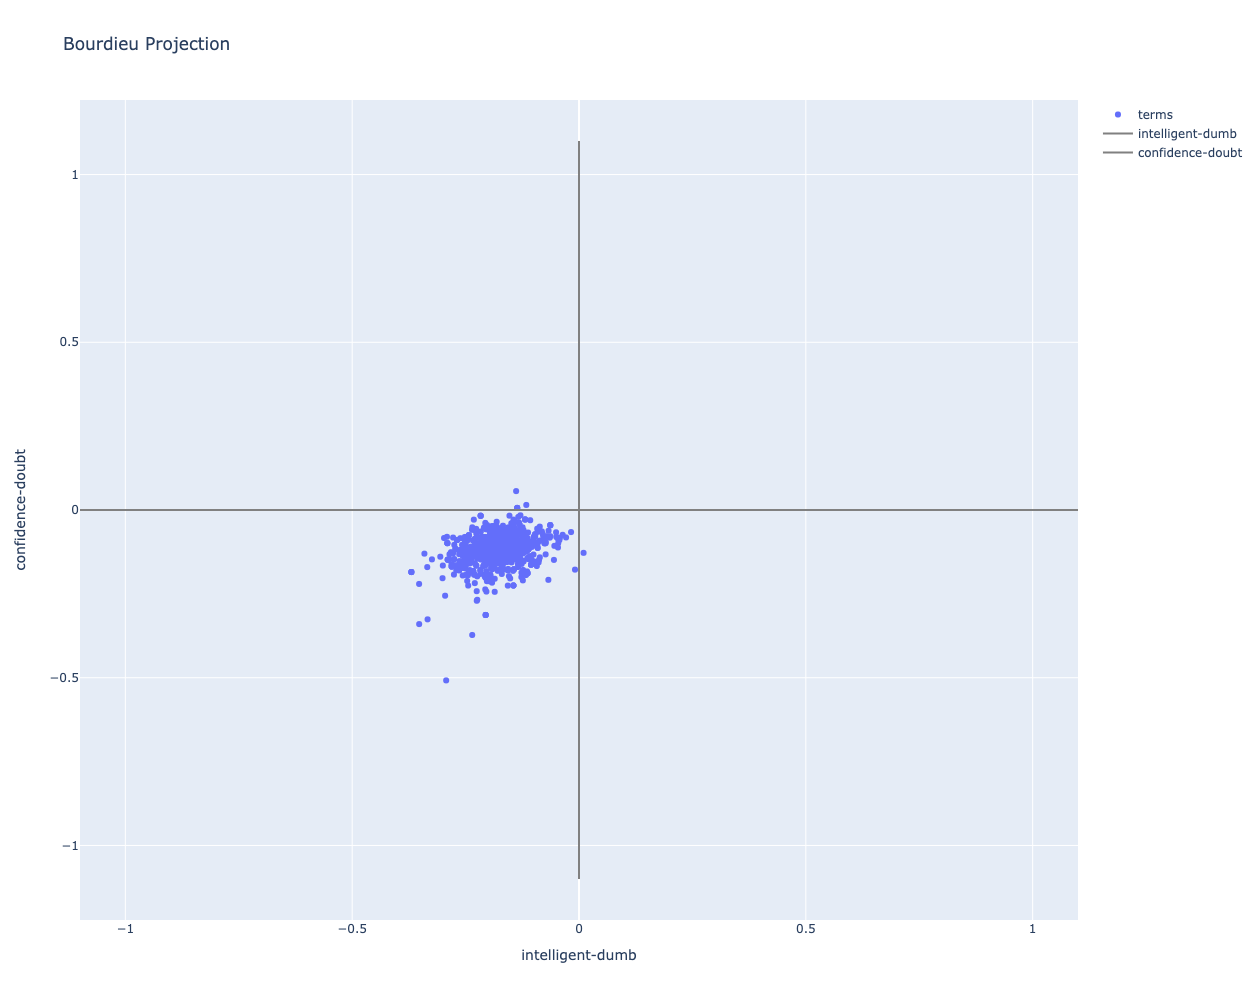

In [80]:
fig_document = model_hum.bourdieu_projection_documents(projection = projection, 
                                                   projection_2 = projection_2,
                                                   width=1000,
                                                   height=1000)
fig_document.show()

In [ ]:
# Next steps: add more more words to dimensions

In [ ]:
    res["text_var_prep"] = res[self.text_var].apply(lambda x: wrap_by_word(x, 10))
